In [584]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [585]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [586]:

from statsmodels.tools.eval_measures import rmse
from sklearn.preprocessing import StandardScaler

In [587]:
from sklearn import preprocessing

In [588]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import TimeSeriesSplit
from sklearn.multioutput import MultiOutputRegressor

from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error

from sklearn.metrics import r2_score
from sklearn.multioutput import RegressorChain

In [589]:
CPIH = pd.read_excel("C:\\Git_test\\Project 2 Docs\\Data Sets\\CPIH_Inlfation_stats_and_lag.xlsx", usecols=['Inflation_Acceleration_lag3'])
CPIH


,Inflation_Acceleration_lag3
0,NaN
1,NaN
2,NaN
3,0.133000
4,0.160333
5,0.025333
6,0.077333
7,-0.013333
8,0.187333
9,0.170000


In [590]:
Consumer_spend = pd.read_excel("C:\\Git_test\\Project 2 Docs\\Data Sets\\Consumer_Spend_Transformed.xlsx")
Consumer_spend

,Time Period,Total Expenditure,Net Tourism,Total Domestic Expenditure,Food And Drink,"Alcohol, Tobacco And Narcotics",Clothing And Footwear,Housing,"Furnishings, Household Equipment And Routine Maintenance Of The House",Health,Transport,Communication,Recreation And Culture,Education,Restaurants And Hotels,Miscellaneous,Total Actual Expenditure
0,2015-01-01,284109,1532,282577,22867,9687,12672,82024,12517,6095,38565,6006,26228,5788,26856,33272,357145
1,2015-04-01,291768,2467,289301,22803,9604,14670,77399,12864,6142,40784,5909,27866,5940,30435,34885,367511
2,2015-07-01,304643,6754,297889,22809,9785,15219,76762,13244,6204,46368,6156,27712,6079,33162,34389,379535
3,2015-10-01,307511,801,306710,23966,10662,19206,80946,15707,6675,37991,7060,30054,6209,31037,37197,381329
4,2016-01-01,296024,1975,294049,23659,9306,13372,85184,13074,6467,40829,6645,26676,6332,27523,34982,369527
5,2016-04-01,306475,3809,302666,24099,9546,15281,81289,13298,6459,42373,6752,27963,6437,32118,37051,385787
6,2016-07-01,321169,8331,312838,24483,9717,15863,80063,13787,6661,47769,7055,27917,6530,35249,37744,402679
7,2016-10-01,325677,1739,323938,25865,10753,20008,85233,16169,6933,39445,8372,31158,6608,33250,40144,406628
8,2017-01-01,307646,2008,305638,24778,9658,13809,85683,14045,6754,42630,6716,28440,6674,29885,36566,384355
9,2017-04-01,318842,4288,314554,26057,10326,15489,81466,14663,6915,43204,6884,30312,6744,34144,38350,401766


In [591]:
print(Consumer_spend.columns.tolist)

<bound method IndexOpsMixin.tolist of Index(['Time Period', 'Total Expenditure', 'Net Tourism',
       'Total Domestic Expenditure', 'Food And Drink',
       'Alcohol, Tobacco And Narcotics', 'Clothing And Footwear', 'Housing',
       'Furnishings, Household Equipment And Routine Maintenance Of The House',
       'Health', 'Transport', 'Communication', 'Recreation And Culture',
       'Education', 'Restaurants And Hotels', 'Miscellaneous',
       'Total Actual Expenditure'],
      dtype='object')>


In [592]:
Consumer_spend.drop(["Total Actual Expenditure","Total Expenditure","Net Tourism","Total Domestic Expenditure"], axis=1, inplace=True)

In [593]:
Consumer_spend.rename(columns={'Furnishings, Household Equipment And Routine Maintenance Of The House':'Furniture, Household Equipment And Maintenance'}, inplace=True)
print(Consumer_spend.columns.tolist)

<bound method IndexOpsMixin.tolist of Index(['Time Period', 'Food And Drink', 'Alcohol, Tobacco And Narcotics',
       'Clothing And Footwear', 'Housing',
       'Furniture, Household Equipment And Maintenance', 'Health', 'Transport',
       'Communication', 'Recreation And Culture', 'Education',
       'Restaurants And Hotels', 'Miscellaneous'],
      dtype='object')>


In [594]:
Merged_df = pd.concat([Consumer_spend, CPIH], axis=1)

print(Merged_df.columns.tolist)
Merged_df

<bound method IndexOpsMixin.tolist of Index(['Time Period', 'Food And Drink', 'Alcohol, Tobacco And Narcotics',
       'Clothing And Footwear', 'Housing',
       'Furniture, Household Equipment And Maintenance', 'Health', 'Transport',
       'Communication', 'Recreation And Culture', 'Education',
       'Restaurants And Hotels', 'Miscellaneous',
       'Inflation_Acceleration_lag3'],
      dtype='object')>


,Time Period,Food And Drink,"Alcohol, Tobacco And Narcotics",Clothing And Footwear,Housing,"Furniture, Household Equipment And Maintenance",Health,Transport,Communication,Recreation And Culture,Education,Restaurants And Hotels,Miscellaneous,Inflation_Acceleration_lag3
0,2015-01-01,22867,9687,12672,82024,12517,6095,38565,6006,26228,5788,26856,33272,NaN
1,2015-04-01,22803,9604,14670,77399,12864,6142,40784,5909,27866,5940,30435,34885,NaN
2,2015-07-01,22809,9785,15219,76762,13244,6204,46368,6156,27712,6079,33162,34389,NaN
3,2015-10-01,23966,10662,19206,80946,15707,6675,37991,7060,30054,6209,31037,37197,0.133000
4,2016-01-01,23659,9306,13372,85184,13074,6467,40829,6645,26676,6332,27523,34982,0.160333
5,2016-04-01,24099,9546,15281,81289,13298,6459,42373,6752,27963,6437,32118,37051,0.025333
6,2016-07-01,24483,9717,15863,80063,13787,6661,47769,7055,27917,6530,35249,37744,0.077333
7,2016-10-01,25865,10753,20008,85233,16169,6933,39445,8372,31158,6608,33250,40144,-0.013333
8,2017-01-01,24778,9658,13809,85683,14045,6754,42630,6716,28440,6674,29885,36566,0.187333
9,2017-04-01,26057,10326,15489,81466,14663,6915,43204,6884,30312,6744,34144,38350,0.170000


In [595]:
print(list(enumerate(Merged_df.columns)))

[(0, 'Time Period'), (1, 'Food And Drink'), (2, 'Alcohol, Tobacco And Narcotics'), (3, 'Clothing And Footwear'), (4, 'Housing'), (5, 'Furniture, Household Equipment And Maintenance'), (6, 'Health'), (7, 'Transport'), (8, 'Communication'), (9, 'Recreation And Culture'), (10, 'Education'), (11, 'Restaurants And Hotels'), (12, 'Miscellaneous'), (13, 'Inflation_Acceleration_lag3')]


In [596]:
Merged_df.isna().sum().sum()

3

In [597]:
Merged_df_copy_split_rows_test = Merged_df.copy()
Merged_df_copy_split_rows_test.dropna(inplace=True)
Merged_df_copy_split_rows_test.reset_index(drop=True, inplace=True)

print(Merged_df_copy_split_rows_test.head(5))
print(Merged_df_copy_split_rows_test.shape)


  Time Period  Food And Drink  Alcohol, Tobacco And Narcotics  \
0  2015-10-01           23966                           10662   
1  2016-01-01           23659                            9306   
2  2016-04-01           24099                            9546   
3  2016-07-01           24483                            9717   
4  2016-10-01           25865                           10753   

   Clothing And Footwear  Housing  \
0                  19206    80946   
1                  13372    85184   
2                  15281    81289   
3                  15863    80063   
4                  20008    85233   

   Furniture, Household Equipment And Maintenance  Health  Transport  \
0                                           15707    6675      37991   
1                                           13074    6467      40829   
2                                           13298    6459      42373   
3                                           13787    6661      47769   
4                         

In [598]:
Merged_df_copy_split_rows_test['Food And Drink']

0     23966
1     23659
2     24099
3     24483
4     25865
5     24778
6     26057
7     25288
8     27325
9     26180
10    26211
11    26643
12    28454
13    26701
14    27093
15    26924
16    28813
17    28949
18    29393
19    27853
20    29463
21    29144
22    29038
23    28293
24    30732
25    29059
26    30729
27    31695
28    35733
29    34830
30    36323
31    34826
32    37262
33    36122
34    36320
35    35640
36    37946
37    36525
Name: Food And Drink, dtype: int64

In [599]:
print(Merged_df_copy_split_rows_test.shape)

(38, 14)


In [600]:
Y = Merged_df_copy_split_rows_test.iloc[:, 1:14]
X = Merged_df_copy_split_rows_test.iloc[:, 1:14]

print(Y.shape)
print(X.shape)


(38, 13)
(38, 13)


In [601]:
X.tail(10)

,Food And Drink,"Alcohol, Tobacco And Narcotics",Clothing And Footwear,Housing,"Furniture, Household Equipment And Maintenance",Health,Transport,Communication,Recreation And Culture,Education,Restaurants And Hotels,Miscellaneous,Inflation_Acceleration_lag3
28,35733,12831,22375,106485,21873,8334,50322,7747,40700,9226,43301,54731,0.606667
29,34830,11062,16975,110270,18632,8192,48942,7186,36497,9296,36908,53513,1.346667
30,36323,12259,19522,102173,19606,8430,52359,7337,37979,9464,45177,53906,0.592667
31,34826,11959,19066,99573,19522,8462,58155,7393,37349,9633,47059,52281,0.988000
32,37262,13120,23446,108025,21202,9018,47999,8417,40045,9803,43900,56827,0.515000
33,36122,11774,17155,113254,17975,8772,49160,7877,37478,9974,37521,54036,0.841667
34,36320,12696,19280,106833,18671,8905,54669,7809,39308,10146,46179,54103,0.239000
35,35640,12496,19568,106329,18681,8784,59941,8096,39215,10323,48889,54436,0.159333
36,37946,13739,23832,115780,20808,9371,49002,9199,42521,10499,46794,59217,0.347667
37,36525,12168,17536,120352,18237,9399,51733,8024,39293,10674,40346,55644,0.464333


In [602]:
cols = X.columns

In [603]:
tscv = TimeSeriesSplit(n_splits=3)

In [604]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1, shuffle=False)

In [605]:
print("Test type: Y_train", Y_train.shape)
print("Test type: Y_test", Y_test.shape)
print("Test type: X_train", X_train.shape)
print("Test type: X_test", X_test.shape)

Test type: Y_train (30, 13)
Test type: Y_test (8, 13)
Test type: X_train (30, 13)
Test type: X_test (8, 13)


In [606]:
Model = {
    'Lasso': {
        'model': Lasso(max_iter=10000), 'tol':1e-3,
        'params': {'alpha': [10, 50, 100, 500, 1000], 'selection': ['cyclic']}
    },
    'Ridge': {
        'model': Ridge(max_iter=10000),'tol':1e-3,
        'params': {'alpha': [10, 50, 100, 500, 1000], 'solver': ['auto', 'svd', 'cholesky', 'lsqr']}
    },
    'RandomForest': {
        'model': RandomForestRegressor(random_state=1),
        'params': {'n_estimators': [50, 100], 'max_depth': [2, 3, 5], 'min_samples_split': [5, 10, 15]}
    }
}

lags_options = [1, 2, 3, 4] 

In [607]:
all_results = {}

for model_name, model_info in Model.items():
    print(f"\nTraining {model_name}")
    all_results[model_name] = {}
    
    # Find most frequent best lag across sectors
    sector_best_lags = []
    for i in range(13):
        best_score = -np.inf
        best_lag_for_sector = None
        
        for lag_value in lags_options:
            X_train_lagged = X_train.shift(lag_value).iloc[lag_value:]
            y_train_lagged = Y_train.iloc[lag_value:]
            
            scaler = preprocessing.StandardScaler()
            X_train_scaled = scaler.fit_transform(X_train_lagged)
            
            # Use actual model and params (not Ridge shortcut)
            grid = GridSearchCV(model_info['model'], model_info['params'], cv=tscv, scoring='neg_mean_squared_error')
            grid.fit(X_train_scaled, y_train_lagged)
            
            if grid.best_score_ > best_score:
                best_score = grid.best_score_
                best_lag_for_sector = lag_value
        
        sector_best_lags.append(best_lag_for_sector)
    
    # Most frequent lag
    best_lag_overall = max(set(sector_best_lags), key=sector_best_lags.count)
    print(f"Most frequent lag for {model_name}: {best_lag_overall}")
    
    # Apply best lag and prepare data once
    X_train_lagged = X_train.shift(best_lag_overall).iloc[best_lag_overall:]
    X_test_lagged = X_test.shift(best_lag_overall).iloc[best_lag_overall:]
    
    scaler = preprocessing.StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train_lagged)
    X_test_scaled = scaler.transform(X_test_lagged)
    
    # Train model for each sector
    for i in range(12):
        y_train_lagged = Y_train.iloc[best_lag_overall:]
        y_test_lagged = Y_test.iloc[best_lag_overall:]
        
        # Grid search
        grid = GridSearchCV(model_info['model'], model_info['params'], cv=tscv, scoring='neg_mean_squared_error')
        grid.fit(X_train_scaled, y_train_lagged)
        
        # Final predictions
        y_pred = grid.best_estimator_.predict(X_test_scaled)
        r2_train = r2_score(y_train_lagged, grid.best_estimator_.predict(X_train_scaled))
        r2_test = r2_score(y_test_lagged, y_pred)
        test_mse = mean_squared_error(y_test_lagged, y_pred)

        
        all_results[model_name][i] = {
            'best_lag': best_lag_overall,
            'best_score': grid.best_score_,
            'model': grid.best_estimator_,
            'predictions': y_pred,
            'r2_train': r2_train,
            'r2_test': r2_test,
            'best_params': grid.best_params_,
            'test_mse': test_mse
        }
Best_model = grid.best_estimator_



Training Lasso


c:\Users\David\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.302e+04, tolerance: 7.182e+03
  model = cd_fast.enet_coordinate_descent(
c:\Users\David\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.686e+03, tolerance: 2.582e+03
  model = cd_fast.enet_coordinate_descent(
c:\Users\David\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

Most frequent lag for Lasso: 1


c:\Users\David\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.302e+04, tolerance: 7.182e+03
  model = cd_fast.enet_coordinate_descent(
c:\Users\David\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.302e+04, tolerance: 7.182e+03
  model = cd_fast.enet_coordinate_descent(
c:\Users\David\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca


Training Ridge
Most frequent lag for Ridge: 1

Training RandomForest
Most frequent lag for RandomForest: 2


In [608]:
print(y_pred[:5])

[[3.20206888e+04 1.18278262e+04 1.81628346e+04 9.92570796e+04
  1.94457170e+04 7.62441397e+03 4.77694143e+04 7.48836973e+03
  3.67110818e+04 8.71203116e+03 3.87437157e+04 4.81628631e+04
  6.06822825e-01]
 [3.20206888e+04 1.18278262e+04 1.81628346e+04 9.92570796e+04
  1.94457170e+04 7.62441397e+03 4.77694143e+04 7.48836973e+03
  3.67110818e+04 8.71203116e+03 3.87437157e+04 4.81628631e+04
  6.06822825e-01]
 [3.18453167e+04 1.20158300e+04 1.73234806e+04 9.80729164e+04
  1.89455991e+04 7.20750019e+03 4.38738440e+04 7.41962631e+03
  3.52790722e+04 8.57995929e+03 3.47700782e+04 4.62036645e+04
  5.57359973e-01]
 [3.13983425e+04 1.17558683e+04 1.78704716e+04 9.76025213e+04
  1.90295778e+04 7.48662743e+03 4.67945559e+04 7.45122918e+03
  3.59397825e+04 8.51441314e+03 3.76775963e+04 4.68652622e+04
  5.41279966e-01]
 [3.15703418e+04 1.18405014e+04 1.78443575e+04 9.80595220e+04
  1.92283893e+04 7.47578808e+03 4.64283395e+04 7.47990598e+03
  3.60984429e+04 8.58414078e+03 3.73710393e+04 4.69950508e+0

In [609]:
print(Best_model.estimators_[0].max_features_)

13


In [610]:
overall_best_r2 = -np.inf
best_model_name = None
best_sector = None

for model_name in all_results:
    for sector_idx in all_results[model_name]:
        if all_results[model_name][sector_idx]['r2_test'] > overall_best_r2:
            overall_best_r2 = all_results[model_name][sector_idx]['r2_test']
            best_model_name = model_name
            best_sector = sector_idx

In [611]:
print("\n" + "="*60)
print("OVERALL BEST MODEL RESULTS")
print("="*60)
print(f"Model Name: {best_model_name}")
print(f"Sector: {best_sector}")
print(f"Best Lag: {all_results[best_model_name][best_sector]['best_lag']}")
print(f"Best Parameters: {all_results[best_model_name][best_sector]['best_params']}")
print(f"\nPerformance Metrics:")
print(f"  Cross-Validation Score (neg MSE): {all_results[best_model_name][best_sector]['best_score']:.4f}")
print(f"  Test Score (neg MSE): {-all_results[best_model_name][best_sector]['test_mse']:.4f}")
print(f"  R² Train Score: {all_results[best_model_name][best_sector]['r2_train']:.4f}")
print(f"  R² Test Score: {all_results[best_model_name][best_sector]['r2_test']:.4f}")
print("="*60)


OVERALL BEST MODEL RESULTS
Model Name: Ridge
Sector: 0
Best Lag: 1
Best Parameters: {'alpha': 10, 'solver': 'lsqr'}

Performance Metrics:
  Cross-Validation Score (neg MSE): -26430405.8939
  Test Score (neg MSE): -8963757.3710
  R² Train Score: 0.7119
  R² Test Score: -1.6157


Store predictions for each models

In [ ]:

print(f"\nModel Type: {best_model_name}")
print(f"Best Parameters: {all_results[best_model_name][best_sector]['best_params']}")

print(f"\nData sizes:")
print(f"Train samples: {len(X_train)}")
print(f"Test samples: {len(X_test)}")
print(f"Features: {X_train.shape[1]}")


Model Type: Ridge
Best Parameters: {'alpha': 10, 'solver': 'lsqr'}

Data sizes:
Train samples: 30
Test samples: 8
Features: 13


In [613]:
y_train_lagged

,Food And Drink,"Alcohol, Tobacco And Narcotics",Clothing And Footwear,Housing,"Furniture, Household Equipment And Maintenance",Health,Transport,Communication,Recreation And Culture,Education,Restaurants And Hotels,Miscellaneous,Inflation_Acceleration_lag3
2,24099,9546,15281,81289,13298,6459,42373,6752,27963,6437,32118,37051,0.025333
3,24483,9717,15863,80063,13787,6661,47769,7055,27917,6530,35249,37744,0.077333
4,25865,10753,20008,85233,16169,6933,39445,8372,31158,6608,33250,40144,-0.013333
5,24778,9658,13809,85683,14045,6754,42630,6716,28440,6674,29885,36566,0.187333
6,26057,10326,15489,81466,14663,6915,43204,6884,30312,6744,34144,38350,0.170000
7,25288,10593,16118,80814,15100,6469,48546,7156,30761,6826,37601,37510,0.247333
8,27325,11737,19843,86044,17421,7165,41866,8404,33589,6918,34700,40703,0.176333
9,26180,10203,14070,88906,15162,6812,44252,6899,29675,7021,30438,37389,0.267333
10,26211,10824,15964,83698,15271,6946,47461,6703,30272,7106,35517,38638,0.259333
11,26643,11050,16622,82950,15708,6699,51943,6874,30835,7172,38249,38904,0.222667


In [614]:
X_Full = X.copy()
Y_Full = Y.copy()

In [615]:
Best_model = all_results[best_model_name][best_sector]['model']  # This is the trained model!
best_params = all_results[best_model_name][best_sector]['best_params']
best_lag = all_results[best_model_name][best_sector]['best_lag']


In [ ]:

X_full_lagged = X_Full.shift(best_lag).iloc[best_lag:]
Y_full_adjusted = Y_Full.iloc[best_lag:]

In [617]:
scaler_full = preprocessing.StandardScaler()
X_full_lagged_scaled = scaler_full.fit_transform(X_full_lagged)

In [ ]:

Final_model = MultiOutputRegressor(Best_model)
Final_model.fit(X_full_lagged_scaled, Y_full_adjusted)

MultiOutputRegressor(estimator=Ridge(alpha=10, max_iter=10000, solver='lsqr'))

In [ ]:
for _ in range(4):
    
    X_new = Merged_df[X_Full.columns].shift(best_lag).iloc[-1:]
    X_new_scaled = scaler_full.transform(X_new)
    forecast = Final_model.predict(X_new_scaled)
    
    
    next_time = pd.date_range(Merged_df['Time Period'].iloc[-1], periods=2, freq='QS')[1]
    new_row = pd.DataFrame([forecast[0]], columns=X_Full.columns)
    new_row.insert(0, 'Time Period', next_time)
    Merged_df = pd.concat([Merged_df, new_row], ignore_index=True)

In [620]:
Merged_df.shape

(45, 14)

In [626]:
Merged_df.tail(5)

,Time Period,Food And Drink,"Alcohol, Tobacco And Narcotics",Clothing And Footwear,Housing,"Furniture, Household Equipment And Maintenance",Health,Transport,Communication,Recreation And Culture,Education,Restaurants And Hotels,Miscellaneous,Inflation_Acceleration_lag3
40,2025-01-01,36525.000000,12168.000000,17536.000000,120352.000000,18237.000000,9399.000000,51733.000000,8024.000000,39293.000000,10674.000000,40346.000000,55644.000000,0.464333
41,2025-04-01,37041.383308,12252.743991,17674.474085,116177.259639,18979.082132,9116.371744,52059.900459,7937.291239,39221.231381,10546.468891,41065.120692,55579.908995,0.630633
42,2025-07-01,36901.123429,12688.715793,19053.441242,110981.725616,19035.278989,8900.312223,53302.424228,7855.289326,39394.422652,10458.175942,45002.509068,55511.799138,0.479997
43,2025-10-01,37190.206901,12809.477221,19501.116723,110763.427358,19615.586979,8847.856718,52918.339150,7879.741790,39708.693186,10415.932669,44948.594847,55855.218760,0.544352
44,2026-01-01,36778.439023,12784.764740,20013.932872,110325.237414,19856.434834,8886.903125,52983.392807,8058.431764,40004.907022,10282.650408,45083.135478,55640.104077,0.541562


In [622]:
print(dir(Final_model))

['__abstractmethods__', '__annotations__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__sklearn_clone__', '__str__', '__subclasshook__', '__weakref__', '_abc_impl', '_build_request_for_signature', '_check_feature_names', '_check_n_features', '_doc_link_module', '_doc_link_template', '_doc_link_url_param_generator', '_estimator_type', '_get_default_requests', '_get_doc_link', '_get_metadata_request', '_get_param_names', '_get_tags', '_more_tags', '_parameter_constraints', '_repr_html_', '_repr_html_inner', '_repr_mimebundle_', '_required_parameters', '_validate_data', '_validate_params', 'estimator', 'estimators_', 'fit', 'get_metadata_routing', 'get_params', 'n_features_in_', 'n_jobs', 'partial_fit', 'p

In [623]:
For_plotting = Merged_df.copy()
For_plotting = pd.melt(
    For_plotting,
    id_vars=["Time Period"],
    value_vars=["Food And Drink", "Alcohol, Tobacco And Narcotics", "Clothing And Footwear", "Housing",	"Furniture, Household Equipment And Maintenance",	"Health",	"Transport",	"Communication",	"Recreation And Culture", "Education",	"Restaurants And Hotels",	"Miscellaneous"],
    var_name="Sector",
    value_name="Total Expenditure",
)

For_plotting


,Time Period,Sector,Total Expenditure
0,2015-01-01,Food And Drink,22867.000000
1,2015-04-01,Food And Drink,22803.000000
2,2015-07-01,Food And Drink,22809.000000
3,2015-10-01,Food And Drink,23966.000000
4,2016-01-01,Food And Drink,23659.000000
...,...,...,...
535,2025-01-01,Miscellaneous,55644.000000
536,2025-04-01,Miscellaneous,55579.908995
537,2025-07-01,Miscellaneous,55511.799138
538,2025-10-01,Miscellaneous,55855.218760


In [624]:
filtered_df = For_plotting[(For_plotting['Time Period'] >= '2025-01-01') & (For_plotting['Time Period'] <= '2026-01-01')]

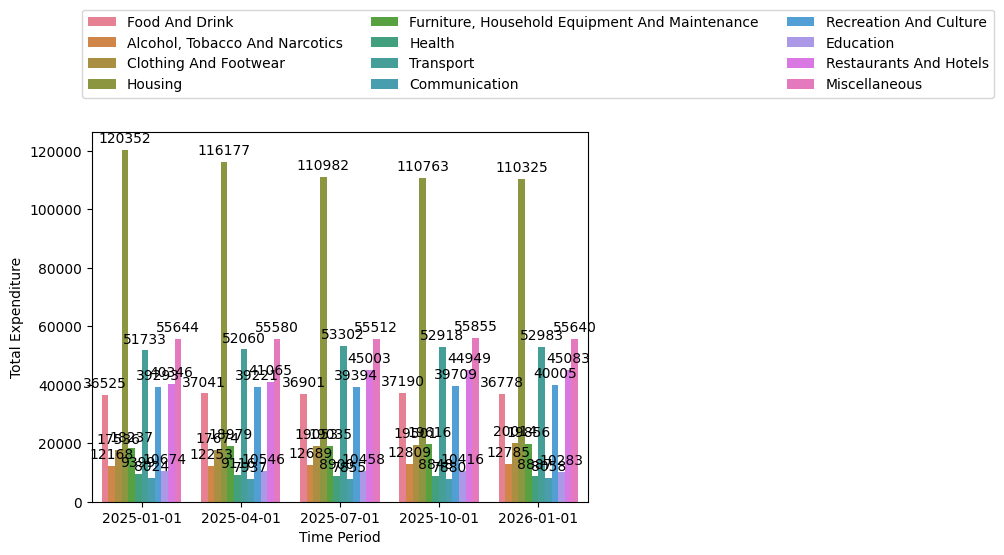

In [625]:
sns.barplot(x='Time Period', y='Total Expenditure', legend='auto', hue="Sector", data=filtered_df)
plt.legend(loc='upper center', bbox_to_anchor=(0.9, 1.35), ncol=3)
plt.xlabel("Time Period",fontsize=10)
plt.ylabel("Total Expenditure",fontsize=10)

ax = plt.gca()
for container in ax.containers:
    ax.bar_label(container, fmt='{:.0f}', padding=3)

plt.show()